In [31]:
from collections import defaultdict
import numpy as np
from itertools import product
from scipy.special import gamma
from scipy.spatial.distance import pdist, squareform, euclidean
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint
from sklearn.linear_model import LinearRegression
import math
from functions_for_clustering import *
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import pairwise_distances
from sklearn import metrics
from entropy_complexity import entropy_complexity, get_borders

In [2]:
df = pd.read_csv('data/test/part_1.csv')
df.head(-1)

,Ticker,index,Date,extremum,-1,-2,-3,-4,-5,-6,...,-275,-276,-277,-278,-279,-280,-281,-282,-283,-284
0,1KN.F,20.0,2020-03-19,0.0,0.096982,0.080357,0.302031,0.290947,0.451661,0.534789,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1KN.F,295.0,2021-04-22,1.0,0.933649,0.970444,0.930030,0.908918,0.876949,0.907711,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1KR.F,22.0,2020-03-23,0.0,0.156874,0.052010,0.133618,0.098099,0.026216,0.181822,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1KR.F,284.0,2021-04-07,1.0,0.947131,0.897271,0.931228,0.896841,0.901139,0.931228,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1KR.SG,134.0,2020-09-01,0.0,0.025797,0.065625,0.076034,0.085539,0.109978,0.087349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11145,CADDKK=X,0.0,2020-02-20,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11146,CADDKK=X,116.0,2020-07-31,0.0,0.109641,0.131751,0.120152,0.156760,0.207865,0.219827,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11147,CADE,31.0,2020-04-03,0.0,0.045611,0.059295,0.090209,0.096798,0.114535,0.107440,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11148,CADE,267.0,2021-03-12,1.0,0.975990,0.944672,0.884125,0.888823,0.871598,0.846022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df = pd.read_csv('data/train/part_0.csv')
#extracting data
df_temp = df.drop(labels=['Ticker', 'index', 'Date'], axis=1)
key1 = -40 #the number of ticks we wish to observe - 1
key2 = min([int(x) for x in df_temp.columns[1:]])
df_temp = df_temp.drop(labels=[str(x) for x in list(range(key2,key1))], axis=1) #drop all ticks but those we're observing
df_temp = df_temp.dropna(axis=0) #drop rows with nan
#     df_temp = df_temp.iloc[]
clustering_data_trended_temp = df_temp.values.tolist() #convert resulting data to list
clustering_data_trended = [x[::-1] for x in clustering_data_trended_temp]

In [59]:
N = 3
M = 1

In [60]:
min_ec, max_ec = get_borders(n=N, m=M)

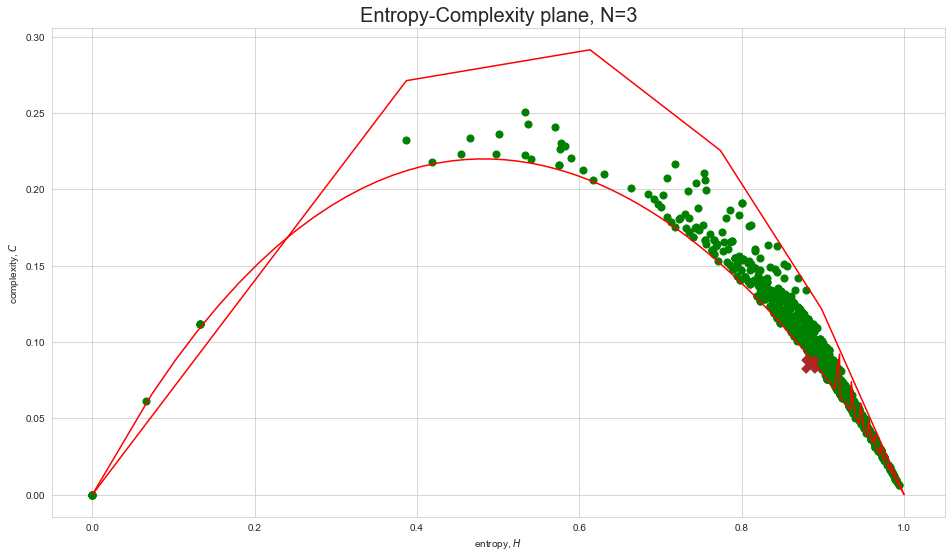

In [81]:
f, ax = plt.subplots(1,1,figsize=(16, 9))

ax.plot(max_ec[:,0], max_ec[:,1],color='r')
ax.plot(min_ec[:,0], min_ec[:,1],color='r')

overall = [[], []]

for i in range(1000):
    sample = clustering_data_trended[i]
    ent, comp = entropy_complexity(sample, N, M)
    overall[0].append(ent)
    overall[1].append(comp)
    ax.scatter(ent, comp, s=200, marker='.', color='green')


ax.scatter(np.mean(overall[0]), np.mean(overall[1]), s=300, marker='X', color='brown')
# ax.scatter(*EC[-2], label=ts_names[-2], s=200, marker='^')
# ax.scatter(*EC[-1], label=ts_names[-1], s=200, marker='s')


ax.set_xlabel('entropy, $H$')
ax.set_ylabel('complexity, $C$')

# ax.legend()
plt.title("Entropy-Complexity plane, N=3", fontsize = 20)
plt.show()